<a href="https://colab.research.google.com/github/jwells52/creating-ai-enabled-systems/blob/main/Humpback_Whale_Dataset_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Download dataset from Kaggle

In [ ]:
!mkdir /root/.kaggle && cp kaggle.json /root/.kaggle/kaggle.json && chmod 600 /root/.kaggle/kaggle.json && kaggle competitions download -c humpback-whale-identification

100% 5.50G/5.51G [01:00<00:00, 97.6MB/s]
100% 5.51G/5.51G [01:00<00:00, 97.7MB/s]


In [ ]:
!unzip humpback-whale-identification.zip

### Imports

In [ ]:
import os
import cv2
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

### Load dataset into pandas dataframe

In [ ]:
images_and_labels = pd.read_csv('train.csv')

In [ ]:
images_and_labels

,Image,Id
0,0000e88ab.jpg,w_f48451c
1,0001f9222.jpg,w_c3d896a
2,00029d126.jpg,w_20df2c5
3,00050a15a.jpg,new_whale
4,0005c1ef8.jpg,new_whale
...,...,...
25356,ffef89eed.jpg,w_9c506f6
25357,fff7faf61.jpg,w_9cf0388
25358,fff9002e0.jpg,w_bd1c3d5
25359,fffcde6fe.jpg,w_9f30885


### Sample 5 images of 5 whale ids and plot


In [ ]:
sample_ids = np.random.choice(images_and_labels['Id'].unique(), 5)
sample_ids

array(['w_05669fe', 'w_6e209a8', 'w_8ace2d9', 'w_b70c09f', 'w_84308d6'],
      dtype=object)

<Figure size 640x480 with 0 Axes>

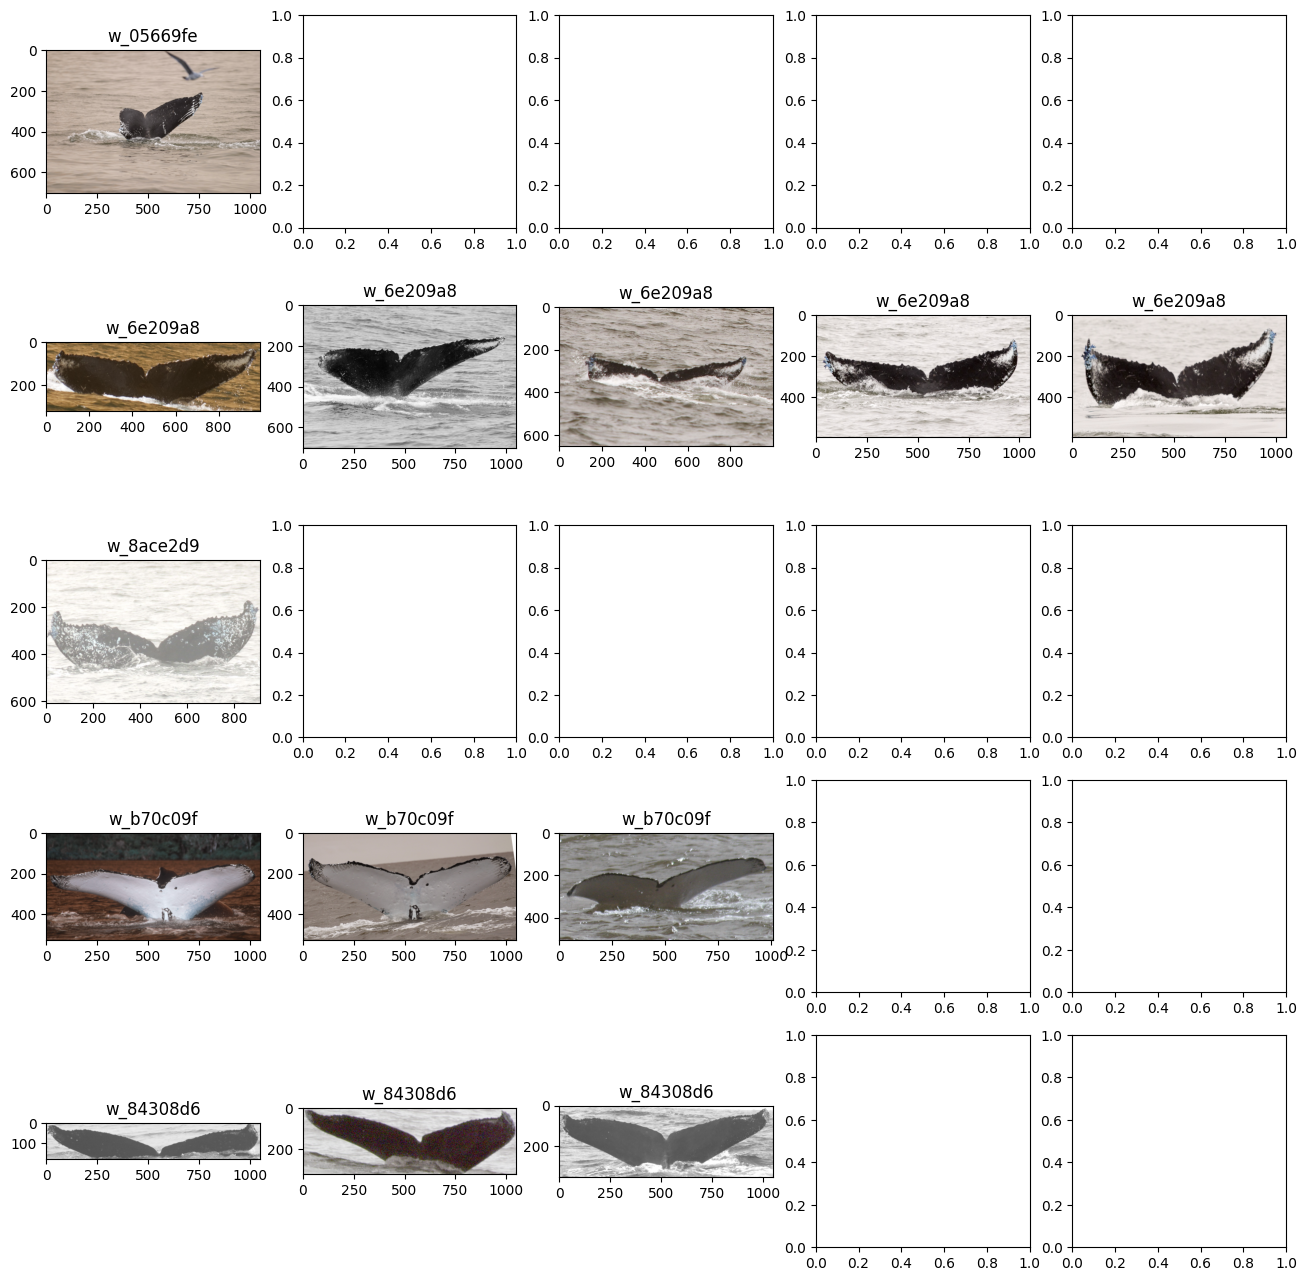

In [ ]:
fig, axs = plt.subplots(5, 5, figsize=(16,16))

for row, _id in enumerate(sample_ids):
  sample_image_paths = images_and_labels[images_and_labels['Id'] == _id]['Image']

  # If id has more than 5 images, limit to the first 5
  if len(sample_image_paths) > 5:
    sample_image_paths = sample_image_paths[:5]

  for col, image_path in enumerate(sample_image_paths):
    image = cv2.imread(
        os.path.join('/content/train', image_path)
    )
    axs[row, col].set_title(_id)
    axs[row, col].imshow(image)

Thoughts:

As you can see from the plot above, there are classes that have less than 5 samples. Which is why we are tackling this problem from a Few Shot Learning perspective. Furthermore, the images are RGB, and contain only the flukes of whales when they break water.

### Sample 25 images of whale ids that are 'new_whale'


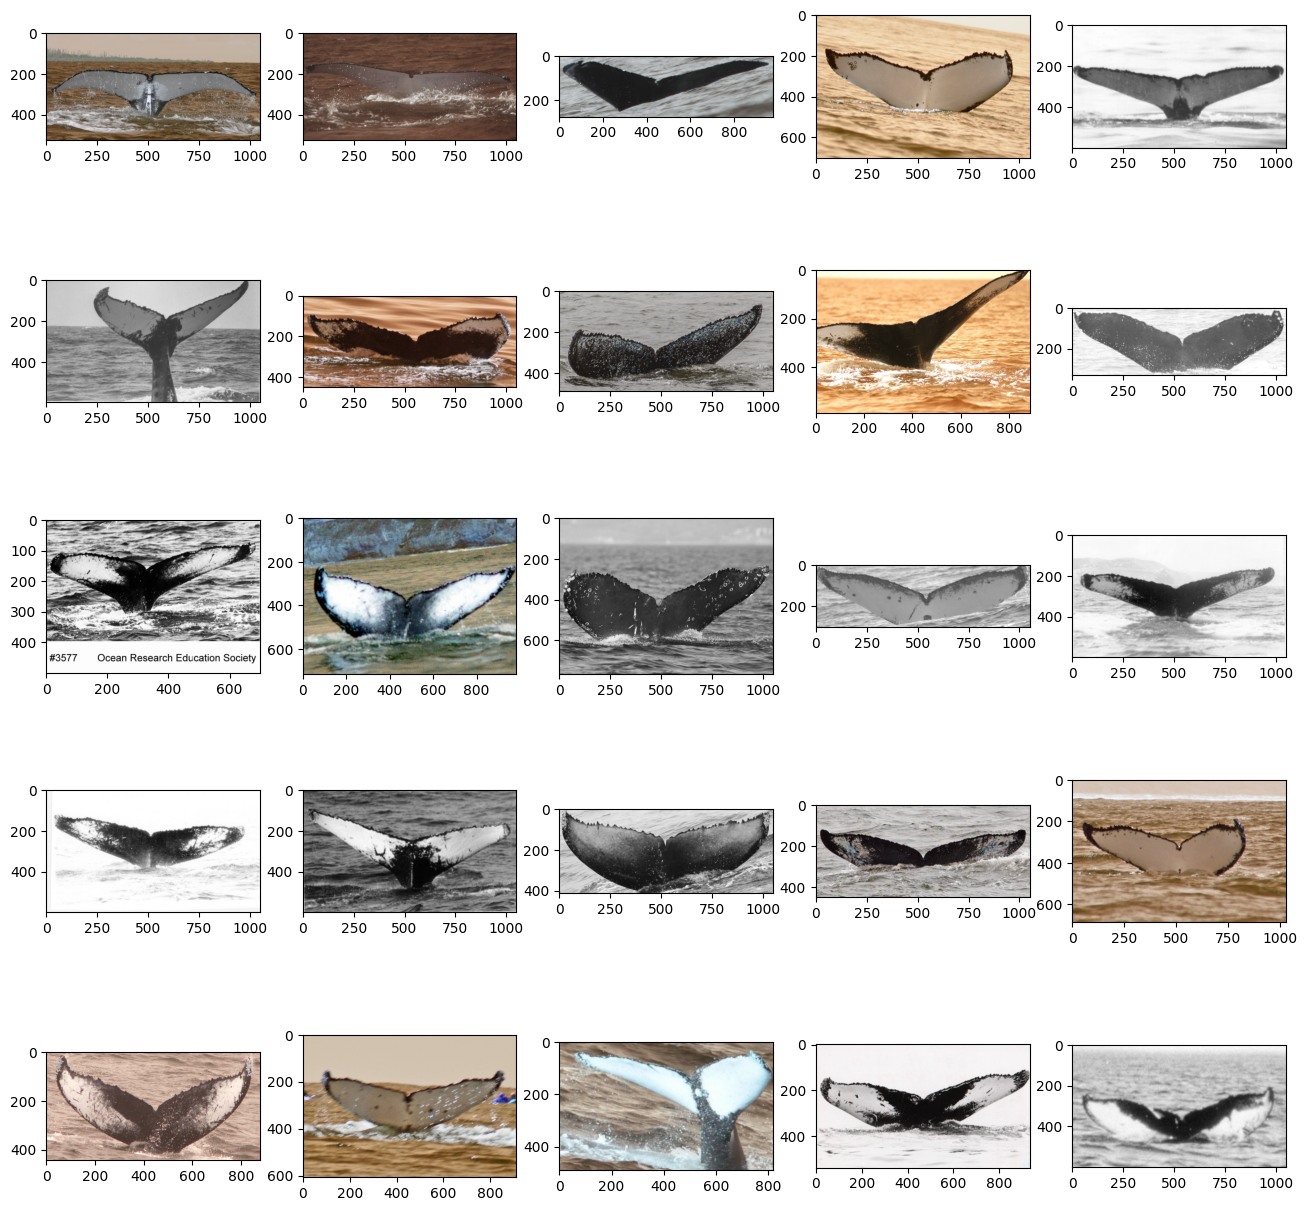

In [ ]:
fig, axs = plt.subplots(5, 5, figsize=(16,16))

plt.figure(1, figsize=(16,16))

new_whale_images = images_and_labels[images_and_labels['Id'] == 'new_whale']['Image']

for i, image_path in enumerate(new_whale_images[:25]):
  plt.subplot(5, 5, i+1)
  image = cv2.imread(
        os.path.join('/content/train', image_path)
  )

  plt.imshow(image)

# Looking at the mean and std of the RGB channels in the dataset

In [ ]:
# TODO

### Statistical analysis of the data

In [ ]:
labels = images_and_labels['Id'].unique()

# Remove new_whale class because thats not of interest for this problem
labels = np.where(labels != 'new_whale')[0]

In [ ]:
print(f"# of classes in data = {len(labels)}")

# of classes in data = 5004


In [ ]:
# Distribution of class sizes

class_counts = {
    label:len(images_and_labels[images_and_labels['Id'] == label])
      for label in labels
  }


counts = np.array(list(class_counts.values()))
print(f"Max number of samples for a class = {np.max(counts)}")
print(f"Min number of samples for a class = {np.min(counts)}")
print(f"Mean of samples for a class = {np.mean(counts):.4f} {chr(177)} {np.std(counts):.4f}")

Max number of samples for a class = 0
Min number of samples for a class = 0
Mean of samples for a class = 0.0000 ± 0.0000


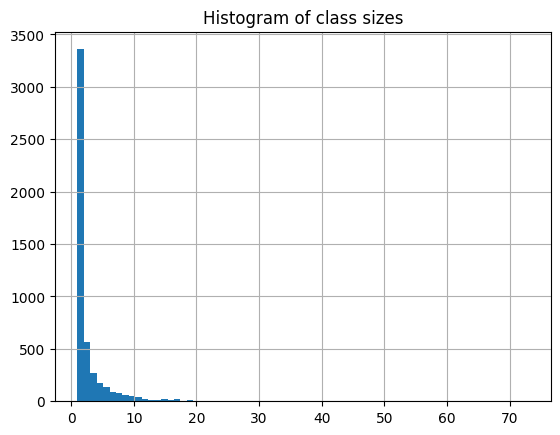

In [ ]:
plt.figure()
plt.title('Histogram of class sizes')
images_and_labels[images_and_labels['Id'] != 'new_whale']['Id'].value_counts().hist(bins=70);